# Proyecto de Aplicación Personal 

## Optimización De Programas de Inversión para Intermediarios Financieros
## -Capital de Riesgo-



![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Logo-ITESO-Principal-60V.png/250px-Logo-ITESO-Principal-60V.png)



### Integrantes:
### Juan Antonio Flores 
### Jazmín Calderón
### Diana Chávez

## Import Package

In [0]:
#Package
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics 
from statistics import stdev
from fractions import Fraction as fr 
from matplotlib import rc
import statsmodels 
import seaborn as sns
import scipy.stats as stats
import locale
import matplotlib
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='juan_anto', api_key='e5CGO21tVPNBZnqDPQQf')


## Database

In [0]:
rtns_anuales = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/rtnsanuales-q42017.csv') #vc annual returns
rend_merc = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/Rend_merc1.csv') #market return(Dow Jones)
oneytr = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/1YTR.csv') #year treasury rate
mi = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/med_des.csv') # vc volatility 
n_f = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/n_f.csv') #cv data (number of funds)
nvo2 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/med_des.csv')
#ren_xm = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/DpS2018q1.csv')
irr = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/IRR_CwPM.csv') #internal rate of return
irr2 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/IRR_2.csv')

# Performance Measures

## Return on Investment

In [3]:
dfr = rtns_anuales #annual returns of venture capital funds
dfr.index.name = 'VC' #name of the dataframe index
dfr

,Quarter Ending,Year,Horizon Return,RND,Years,Annualized return,Annualized STD,Unnamed: 7
VC,,,,,,,,
0,Q1,1997.0,-0.15,-96.333333,1997.0,31.34,7.557559,NaN
1,Q2,1997.0,14.30,-0.001399,NaN,NaN,NaN,NaN
2,Q3,1997.0,14.28,-0.796218,NaN,NaN,NaN,NaN
3,Q4,1997.0,2.91,2.467354,NaN,NaN,NaN,NaN
4,Q1,1998.0,10.09,-0.470763,1998.0,28.53,7.268693,NaN
5,Q2,1998.0,5.34,-1.372659,NaN,NaN,NaN,NaN
6,Q3,1998.0,-1.99,-8.582915,NaN,NaN,NaN,NaN
7,Q4,1998.0,15.09,0.284294,NaN,NaN,NaN,NaN
8,Q1,1999.0,19.38,0.993292,1999.0,171.01,28.612102,NaN


In [0]:
ds_r = dfr['Annualized return']

## Expected Value of Return

In [5]:
ds_m = dfr['Annualized return'].mean() #average annual returns  
ds_m

14.550952380952383

## Volatility

In [6]:
ds_ds = dfr['Annualized STD'].mean() #Average annual volatility
ds_ds

5.5037116033333335

## Sharpe index

In [7]:
One_Year_Treasury_Bill_Rate = 2.25 #the annual treasury rate  
OYTBR = One_Year_Treasury_Bill_Rate
OYTBR1 = One_Year_Treasury_Bill_Rate / 100
Sharpe = ( ds_m - OYTBR ) / ds_ds #sharpe index calculation
Sharpe #sharpe index for the period of 20 years

2.235028516665424

##$ M^2$ index

In [8]:
rm = rend_merc #market return, in this case it was used the Dow jones index as a market
rm.index.name = 'Dow Jones'
rm

,Año,Rendimiento anual,Rendimiento anual (%)
Dow Jones,,,
0,1997,-0.000594,-0.059358
1,1998,-0.000555,-0.055544
2,1999,-0.000564,-0.056393
3,2000,0.000169,0.016934
4,2001,0.000521,0.052142
5,2002,0.000809,0.080934
6,2003,-0.000980,-0.098030
7,2004,0.000030,0.003000
8,2005,-0.000131,-0.013127


In [9]:

rmm = rm['Rendimiento anual (%)'].mean() #avarage market return
rmd = rm['Rendimiento anual (%)'] #annual market return
rmds = rmd.std() #market return volatility 
rp = OYTBR*(1-(rmds/ds_ds)) + ds_m*(rmds/ds_ds) #portfolio performance adjusted to risk
M = rp - rmm #m squared calculation for all the period time
M

2.5079171692053466

## Individual Measurements

In [10]:
oneytr #year treasury rate since 1996 till 2016

,Año,1_Year_Treasury_Rate_(%)
0,1996,5.85
1,1997,5.59
2,1998,5.35
3,1999,5.08
4,2000,6.19
5,2001,3.53
6,2002,1.97
7,2003,1.07
8,2004,2.14
9,2005,3.61


In [0]:
ren_an = mi['Rendimiento %'] #vc annualized return
tlr = oneytr['1_Year_Treasury_Rate_(%)'] #year treasury rate
std_p = mi['Volatilidad (%)'] #vc annualized volatility
std_mer = rm['Rendimiento anual (%)'] #market annual return
ren_p = mi['Rendimiento %'] #vc returns

In [0]:
#sharpe calculation for each year
sharpevc = []
for i in range(21):
    sharpevc.append((ren_an[i]-tlr[i])/std_p[i])


In [0]:
#m square calculation for each yaer
rp_m2 = []
for i in range (21):
    mm2 = (tlr[i] * (1-(std_mer[i]/std_p[i]))) + (ren_p[i] * (std_mer[i]/std_p[i]))
    rp_m2.append(mm2)


In [0]:
#m square calculation for each yaer
m2vc = []
for i in range (21):
  m2 = (rp_m2[i] - std_mer[i])
  m2vc.append(m2)
  


In [0]:
lista = []
for i in range(1995,2016):
  lista.append(1+i)


In [16]:
#dataframe creating for heat map
vc_pd = pd.DataFrame(columns = ['Año','VC en operación','Rendimiento %','Volatilidad %','Sharpe','M^2']) 
vc_pd['Año'] = mi['Año']
#vc_pd.set_index('Año',inplace=True)
vc_pd['VC en operación'] = mi['VC en operación']
vc_pd['Rendimiento %'] = mi['Rendimiento %']
vc_pd['Volatilidad %'] = mi['Volatilidad (%)']
vc_pd.fillna("-")
vc_n = vc_pd.drop(21)
vc_n2 = vc_n.drop(22)
vc_n2['Sharpe'] = sharpevc
vc_n2['M^2'] = m2vc
vc_n2

,Año,VC en operación,Rendimiento %,Volatilidad %,Sharpe,M^2
0,1996.0,40.0,31.34,7.557559,3.372782,5.709157
1,1997.0,71.0,28.53,7.268693,3.156001,5.470246
2,1998.0,81.0,171.01,28.612102,5.789858,5.079886
3,1999.0,110.0,23.90,20.423797,0.921474,5.078670
4,2000.0,156.0,-47.34,5.074580,-10.548655,5.587824
5,2001.0,56.0,-39.04,1.093648,-38.924761,0.298741
6,2002.0,33.0,-3.99,2.377062,-2.507297,2.313822
7,2003.0,40.0,14.53,3.369761,3.994348,1.078983
8,2004.0,67.0,5.94,2.364523,1.607090,2.132031
9,2005.0,65.0,16.42,3.804598,3.366979,3.485343


## Internal Rate of Return (IRR)

In [17]:
#Internal rate of return by sector 
irr

,Vintage Year,Number of Funds,CA_Benchmark_IRR,S&P 500_Index_mPME IRR,S&P 500_Index_Value-Add,Russell 2000_Index_mPME IRR,Russell 2000_Index_Value-Add,CA_Benchmark_TVPI,S&P 500_Index_mPME TVPI,Russell 2000_Index_mPME TVPI,CA_Benchmark_DPI,S&P 500_Index_mPME DPI,Russell 2000_Index_mPME DPI
0,1988,26,18.88,15.20,368,13.66,522,2.46,2.05,1.88,2.42,1.99,1.82
1,1989,37,19.16,16.65,251,14.34,483,2.59,2.28,1.97,2.59,2.28,1.97
2,1990,17,33.11,15.81,"1,730",15.48,"1,763",3.15,1.71,1.65,3.15,1.71,1.65
3,1991,17,27.89,18.76,913,15.04,"1,285",3.17,2.11,1.80,3.17,2.11,1.80
4,1992,22,32.60,20.45,"1,215",14.17,"1,843",3.09,1.94,1.59,3.09,1.94,1.58
5,1993,36,46.71,23.27,"2,344",14.33,"3,238",4.13,1.89,1.49,4.13,1.89,1.49
6,1994,41,59.31,22.01,"3,730",12.63,"4,668",5.41,1.79,1.43,5.41,1.79,1.43
7,1995,35,88.48,19.33,"6,915",10.10,"7,838",6.07,1.55,1.31,6.07,1.55,1.31
8,1996,41,100.83,12.06,"8,877",8.29,"9,254",4.91,1.37,1.31,4.90,1.35,1.29
9,1997,71,91.80,5.78,"8,602",7.32,"8,448",3.10,1.18,1.28,3.09,1.17,1.26


In [18]:
type(irr['CA_Benchmark_IRR'][1])

numpy.float64

# Plots

## Plot #1 Return through the years


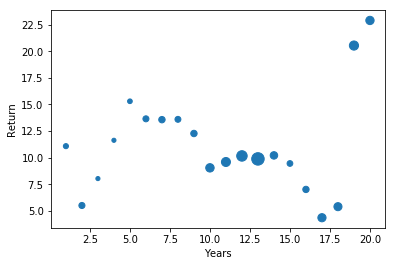

In [19]:
n_f.plot.scatter('Years', 'Return', s=n_f.Funds)

#### The previous graph shows the return through the years from 1996 to 2016 of risk capital (VC) depending on the number of venture capital funds, the larger the number of venture capital funds the greater the reflected spot.

Variables to use:


1.   Returns
2.   Years
3.   VC funds




> *Return:  percentage*


> *Years:  total period of time*


> *VC funds:  number of funds according to year *


Considering 20 years since 1996 till 2016




## Plot #2 Heat map Performance Measures


In [0]:
a_vc = []
for i in range(1995,2016):
    a_vc.append(1+i)

In [0]:
nvc_n2 = pd.DataFrame(columns = ['Rendimiento %','Volatilidad %','Sharpe','M^2'])
nvc_n2['Rendimiento %'] = vc_n2['Rendimiento %']
nvc_n2['Volatilidad %'] = vc_n2['Volatilidad %']
nvc_n2['Sharpe'] = vc_n2['Sharpe']
nvc_n2['M^2'] = vc_n2['M^2']

#dfr1 = dfr2.drop(columns = ['Years'])
#dfr1 = dfr1.fillna(0)

In [0]:
vegetables =a_vc
farmers = ["Returns", "Volatility","Sharpe","M^2"]

harvest = np.array([nvc_n2.iloc[0],nvc_n2.iloc[1],nvc_n2.iloc[2],nvc_n2.iloc[3],nvc_n2.iloc[4],
                   nvc_n2.iloc[5],nvc_n2.iloc[6],nvc_n2.iloc[7],nvc_n2.iloc[8],nvc_n2.iloc[9],
                   nvc_n2.iloc[10],nvc_n2.iloc[11],nvc_n2.iloc[12],nvc_n2.iloc[13],nvc_n2.iloc[14],
                   nvc_n2.iloc[15],nvc_n2.iloc[16],nvc_n2.iloc[17],nvc_n2.iloc[18],nvc_n2.iloc[19]])

In [0]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
        
        # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


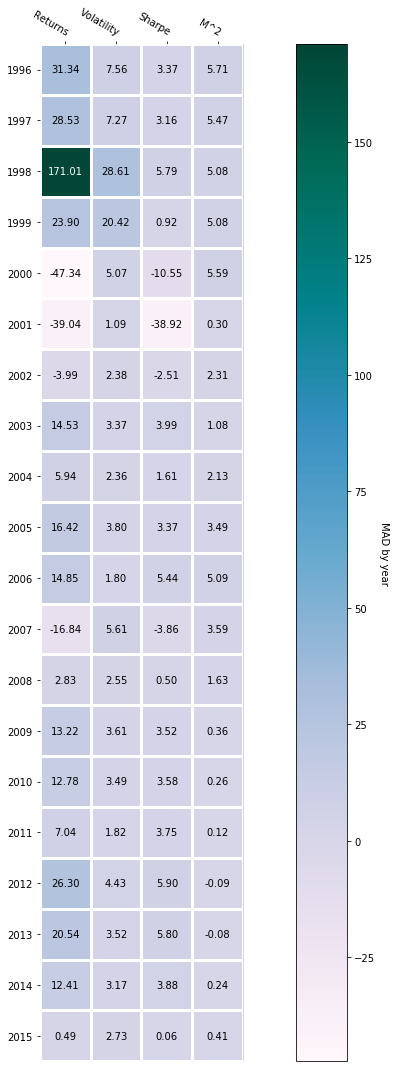

In [24]:
fig, ax = plt.subplots(figsize=(15,15))

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="PuBuGn", cbarlabel="MAD by year")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()

#### The previous plot show all the perfomance measures together through the years. It is a good way to be able to compare the different measures according to the corresponding year.

Variables to use:

1.   Return
2.   Volatility
3.   Sharpe index
4.   $ M^2$ index



> *Note: All data is annualized*




## Plot #3 Returns and Volatility through the years

In [0]:
mi_i = nvo2.drop(22)
mi_j = mi_i.drop(21)
mij = pd.DataFrame( columns = ['Rendimiento %','Volatilidad %'])
mij['Rendimiento %'] = mi_j['Rendimiento %']
mij['Volatilidad %'] = mi_j['Volatilidad (%)']
mij2 = mi_j.drop(columns = ['Volatilidad (%)'])
mi_j3 = mij2.drop(columns = ['VC en operación'])


In [0]:
k = nvo2.drop(columns = ['VC en operación'])
kk = k.drop(22)
ki = kk.drop(21)

In [0]:
heatmap1_data = pd.pivot_table(ki, values=None, 
                     index=['Año'], 
                     columns=None) 

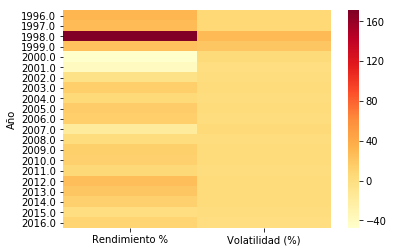

In [28]:
sns.heatmap(heatmap1_data, cmap="YlOrRd")


#### The previous plot compare the annualized return with the annualized volatility of each year. Being a heat map shows the best performance.

Variables to use:



1.   *Volatility: annualized*
2.  *Return: annualized*
3.  *Years*


## Plot #4 Heat map: Returns through the Years

In [0]:
rtns_anuales1 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/rtb_an_cdr.csv')
dfr2 = rtns_anuales1.drop(columns = ['Years'])
dfr2.index.name = 'VC'


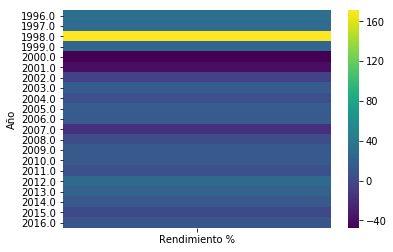

In [30]:
dff = mi_j3
heatmap2_data = pd.pivot_table(dff,values=None, index=['Año'])
heatmap2_data.head(n=25)
sns.heatmap(heatmap2_data, cmap="viridis")

#### The previous plot shows the annualized returns of VC funds through the years.

Variables to use:

1.   *Years*
2.  *Returns*

> *Considering 20 years since 1996 till 2016*



## Plot #5 Annualized volatility vs Annualized return

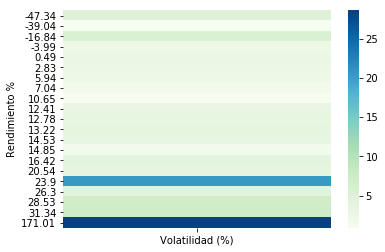

In [31]:
df3 = mi_j[['Rendimiento %','Volatilidad (%)']]
heatmap3_data = pd.pivot_table(df3,values=None, index=['Rendimiento %'], columns=None)
heatmap3_data.head(n=25)
sns.heatmap(heatmap3_data, cmap="GnBu")

#### The previous plot shows the annualized volatility and annualized returns of VC funds through the years.

Variables to use:


1.   *Returns*
2.   *Volatility*



> *Considering 20 years since 1996 till 2016*

## Plot #6 Heat map by Market Sectors

In [0]:
a_vc2 = []
for i in range(1995,2016):
    a_vc2.append(1+i)

In [0]:
a_vc2

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [0]:
nvc_n3 = pd.DataFrame(columns = ['CA Benchmark IRR','S&P 500 Index mPME IRR','S&P 500 Index Value Add','Russell 2000 Index mPME IRR', 'Russell 2000 Index Value Add','CA Benchmark TPVI','S&P 500 Index mPME TPVI','Russell 2000 Index mPME TPVI','CA Benchmark DPI','S&P 500 Index mPME DPI','Russell 2000 Index mPME DPI'])
nvc_n3['CA Benchmark IRR'] = irr2['CA_Benchmark_IRR']
nvc_n3['S&P 500 Index mPME IRR'] = irr2['S&P 500_Index_mPME IRR']
nvc_n3['S&P 500 Index Value Add'] = irr2['S&P 500_Index_Value-Add']
nvc_n3['Russell 2000 Index mPME IRR'] = irr2['Russell 2000_Index_mPME IRR']
nvc_n3['Russell 2000 Index Value Add'] = irr2['Russell 2000_Index_Value-Add']
nvc_n3['CA Benchmark TPVI'] = irr2['CA_Benchmark_TVPI']
nvc_n3['S&P 500 Index mPME TPVI'] = irr2['S&P 500_Index_mPME TVPI']
nvc_n3['Russell 2000 Index mPME TPVI'] = irr2['Russell 2000_Index_mPME TVPI']
nvc_n3['CA Benchmark DPI'] = irr2['CA_Benchmark_DPI']
nvc_n3['S&P 500 Index mPME DPI'] = irr2['S&P 500_Index_mPME DPI']
nvc_n3['Russell 2000 Index mPME DPI'] = irr2['Russell 2000_Index_mPME DPI']
nvc_n3['Year'] = a_vc2
nvc_n3=nvc_n3.set_index('Year')
nvc_n3

,CA Benchmark IRR,S&P 500 Index mPME IRR,S&P 500 Index Value Add,Russell 2000 Index mPME IRR,Russell 2000 Index Value Add,CA Benchmark TPVI,S&P 500 Index mPME TPVI,Russell 2000 Index mPME TPVI,CA Benchmark DPI,S&P 500 Index mPME DPI,Russell 2000 Index mPME DPI
Year,,,,,,,,,,,
1996,100.83,12.06,"8,877",8.29,"9,254",4.91,1.37,1.31,4.90,1.35,1.29
1997,91.80,5.78,"8,602",7.32,"8,448",3.10,1.18,1.28,3.09,1.17,1.26
1998,11.88,1.61,"1,027",7.49,439,1.50,1.08,1.43,1.48,1.06,1.40
1999,-0.89,2.08,-296,6.79,-768,0.94,1.15,1.52,0.91,1.08,1.44
2000,0.73,5.25,-452,7.87,-714,1.05,1.46,1.72,0.95,1.24,1.48
2001,2.72,6.84,-412,8.46,-575,1.19,1.56,1.71,1.06,1.31,1.44
2002,-0.49,7.64,-813,8.59,-907,0.97,1.68,1.76,0.85,1.27,1.35
2003,9.18,7.08,210,7.52,166,1.74,1.54,1.58,1.52,1.32,1.36
2004,8.33,7.62,71,7.71,62,1.66,1.63,1.63,1.27,1.18,1.20


In [0]:
nvc_n3.iloc[0]

CA Benchmark IRR                100.83
S&P 500 Index mPME IRR           12.06
S&P 500 Index Value Add          8,877
Russell 2000 Index mPME IRR       8.29
Russell 2000 Index Value Add     9,254
CA Benchmark TPVI                 4.91
S&P 500 Index mPME TPVI           1.37
Russell 2000 Index mPME TPVI      1.31
CA Benchmark DPI                   4.9
S&P 500 Index mPME DPI            1.35
Russell 2000 Index mPME DPI       1.29
Name: 1996, dtype: object

In [0]:
vegetables2 =a_vc2
farmers2 = ["CA Benchmark IRR", "S&P 500 Index mPME IRR","S&P 500 Index Value Add","Russell 2000 Index mPME IRR","Russell 2000 Index Value Add","CA Benchmark TPVI","S&P 500 Index mPME TPVI","Russell 2000 Index mPME TPVI","CA Benchmark DPI","S&P 500 Index mPME DPI","Russell 2000 Index mPME DPI"]

#harvest2 = np.array([nvc_n3.loc[1996],nvc_n3.loc[1997],nvc_n3.loc[1998],nvc_n3.loc[1999],nvc_n3.loc[2000],
                   #nvc_n3.loc[2001],nvc_n3.loc[2002],nvc_n3.loc[2003],nvc_n3.loc[2004],nvc_n3.loc[2005],
                   #nvc_n3.loc[2006],nvc_n3.loc[2007],nvc_n3.loc[2008],nvc_n3.loc[2009],nvc_n3.loc[2010],
                   #nvc_n3.loc[2011],nvc_n3.loc[2012],nvc_n3.loc[2013],nvc_n3.loc[2014],nvc_n3.loc[2015],
                   #nvc_n3.loc[2016]])

In [0]:
nvc_n3.loc[1996]

CA Benchmark IRR                100.83
S&P 500 Index mPME IRR           12.06
S&P 500 Index Value Add          8,877
Russell 2000 Index mPME IRR       8.29
Russell 2000 Index Value Add     9,254
CA Benchmark TPVI                 4.91
S&P 500 Index mPME TPVI           1.37
Russell 2000 Index mPME TPVI      1.31
CA Benchmark DPI                   4.9
S&P 500 Index mPME DPI            1.35
Russell 2000 Index mPME DPI       1.29
Name: 1996, dtype: object

In [0]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
        
        # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

TypeError: ignored

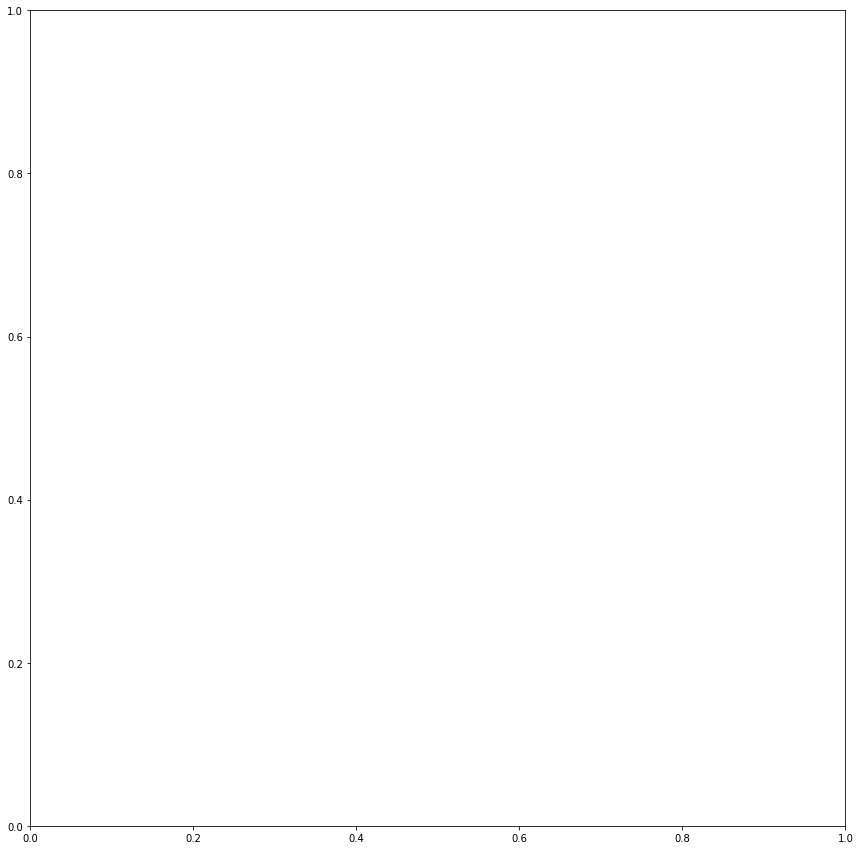

In [0]:
fig, ax = plt.subplots(figsize=(15,15))

im, cbar = heatmap(harvest2, vegetables2, farmers2, ax=ax,
                   cmap="PuBuGn", cbarlabel="MAD by year")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()

## Pot #7 Pie Chart

In [0]:
in_in_ew = [40,
            71,
            81,
            110,
            156,
            56,
            33,
            40,
            67,
            65,
            84,
            69,
            66,
            23,
            49,
            45,
            57,
            57,
            80,
            58,
            66]

In [0]:
ew_wei2= []
for i in range(len(in_in_ew)):
    nn = in_in_ew[i]/sum(in_in_ew)*100
    ew_wei2.append(nn)

In [0]:
a_vc3 = []
for i in range(1995,2016):
    a_vc3.append(1+i)
    


In [85]:
labels = a_vc3
values = ew_wei2

trace = go.Pie(labels=labels, values=values, hole=.5, title = "VC porcentage by year of 1373 funds")

py.iplot([trace], filename='basic_pie_chart')
#total de fondos 1373

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~juan_anto/0 or inside your plot.ly account where it is named 'basic_pie_chart'


## Plot #8 Time Series

AttributeError: ignored

In [0]:
irr_1 = go.Scatter(x=y_tir, y=irr_df['Chemical/Materials'], name = 'Chemical Material', line = dict(color = "skyblue"),
                   opacity = 0.8)
irr_2 = go.Scatter(x=y_tir, y=irr_df['Consumer/Retail'], name = 'Consumer Retail', line = dict(color = "deepskyblue"),
                   opacity = 0.8)
irr_3 = go.Scatter(x=y_tir, y=irr_df['Electronics'], name = 'Electronics', line = dict(color = "aliceblue"),
                   opacity = 0.8)
irr_4 = go.Scatter(x=y_tir, y=irr_df['Energy'], name = 'Energy', line = dict(color = "cadetblue"),
                   opacity = 0.8)
irr_5 = go.Scatter(x=y_tir, y=irr_df['Environmental'], name = 'Environmental', line = dict(color = "steelblue"),
                   opacity = 0.8)
irr_6 = go.Scatter(x=y_tir, y=irr_df['Financial Services'], name = 'Financial Services', line = dict(color = "lightskyblue"),
                   opacity = 0.8)
irr_7 = go.Scatter(x=y_tir, y=irr_df['Hardware/Systems'], name = 'Hardware Systems', line = dict(color = "darkturquoise"),
                   opacity = 0.8)
irr_8 = go.Scatter(x=y_tir, y=irr_df['HealthCare/Biotech'], name = 'HealthCare Biotech', line = dict(color = "darkblue"),
                   opacity = 0.8)
irr_9 = go.Scatter(x=y_tir, y=irr_df['Industrial'], name = 'Idustrial', line = dict(color = "powderblue"),
                   opacity = 0.8)
irr_10 = go.Scatter(x=y_tir, y=irr_df['Information Technology'], name = 'Information Technology', line = dict(color = "darkcyan"),
                   opacity = 0.8)
irr_11 = go.Scatter(x=y_tir, y=irr_df['Manufacturing'], name = 'Manufacturing', line = dict(color = "midnightblue"),
                   opacity = 0.8)
irr_12 = go.Scatter(x=y_tir, y=irr_df['Media/Communications'], name = 'Media Communications', line = dict(color = "navy"),
                   opacity = 0.8)
irr_13 = go.Scatter(x=y_tir, y=irr_df['Software/Services'], name = 'Software Services', line = dict(color = "lightblue"),
                   opacity = 0.8)


data = [irr_1,irr_2,irr_3,irr_4,irr_5,irr_6,irr_7,irr_8,irr_9,irr_10,irr_11,irr_12,irr_13]

layout = dict(title = "IRR Min Variance Weights 2009-2019")


fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "IRR Min Variance Weights 2009-2019")

## Plot #9

In [88]:
trace1 = go.Scatter(
    x=lista,
    y=vc_pd['Rendimiento %'],
    name='Rendimiento'
)
trace2 = go.Scatter(
    x=lista,
    y=vc_pd['Volatilidad %'],
    name='Volatilidad',
    yaxis='y2'
)
trace3 = go.Scatter(
    x=lista,
    y=vc_n2['Sharpe'],
    name='Ratio Sharpe',
    yaxis='y3'
)
trace4 = go.Scatter(
    x=lista,
    y=vc_n2['M^2'],
    name='$m^2$ ',
    yaxis='y4'
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Desempeño de Portafolio con ponderaciones iguales',
    width=1500,
    xaxis=dict(
        domain=[0.2, 0.7]
    ),
    yaxis=dict(
        title='y rend',
        titlefont=dict(
            color='#1f77b4'
        ),
        tickfont=dict(
            color='#1f77b4'
        )
    ),
    yaxis2=dict(
        title='y vol',
        titlefont=dict(
            color='#ff7f0e'
        ),
        tickfont=dict(
            color='#ff7f0e'
        ),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.15
    ),
    yaxis3=dict(
        title='y $m^2$',
        titlefont=dict(
            color='#d62728'
        ),
        tickfont=dict(
            color='#d62728'
        ),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=dict(
        title='y sharpe',
        titlefont=dict(
            color='green'
        ),
        tickfont=dict(
            color='green'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.80
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-multiple')